In [85]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas 

In [86]:
# data = load_breast_cancer()
# X = data.data
# y = data.target


In [87]:
data = pandas.read_csv(r'C:\Users\admin\Desktop\sem-5\AdvancedML\creditcard.csv')
X = data.drop('Class', axis=1)
y = data['Class']

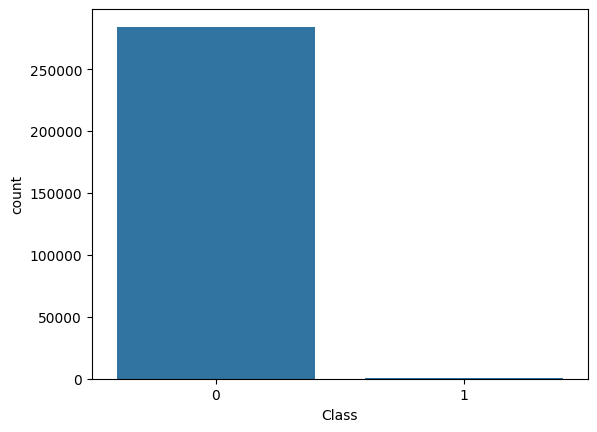

In [88]:
sns.countplot(x=y)
plt.title("")
plt.show()

In [89]:
print(np.bincount(y))

[284315    492]


In [90]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf = LogisticRegression(max_iter=10000, random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [92]:

accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9991046662687406


In [93]:

probs = clf.predict_proba(X_test)
print("Predicted class probabilities:\n", probs)

Predicted class probabilities:
 [[5.34882196e-08 9.99999947e-01]
 [9.99943507e-01 5.64927056e-05]
 [9.99951587e-01 4.84132130e-05]
 ...
 [9.99268795e-01 7.31205476e-04]
 [9.99939286e-01 6.07141526e-05]
 [9.98634337e-01 1.36566323e-03]]


In [94]:
probs = clf.predict_proba(X_test)

print("Predicted class probabilities (in %):")
for i, prob in enumerate(probs):
    class_0_pct = prob[0] * 100
    class_1_pct = prob[1] * 100
    print(f"Sample {i+1}: Class 0 -> {class_0_pct:.2f}%, Class 1 -> {class_1_pct:.2f}%")


Predicted class probabilities (in %):
Sample 1: Class 0 -> 0.00%, Class 1 -> 100.00%
Sample 2: Class 0 -> 99.99%, Class 1 -> 0.01%
Sample 3: Class 0 -> 100.00%, Class 1 -> 0.00%
Sample 4: Class 0 -> 99.94%, Class 1 -> 0.06%
Sample 5: Class 0 -> 99.99%, Class 1 -> 0.01%
Sample 6: Class 0 -> 99.99%, Class 1 -> 0.01%
Sample 7: Class 0 -> 99.99%, Class 1 -> 0.01%
Sample 8: Class 0 -> 99.98%, Class 1 -> 0.02%
Sample 9: Class 0 -> 99.93%, Class 1 -> 0.07%
Sample 10: Class 0 -> 99.95%, Class 1 -> 0.05%
Sample 11: Class 0 -> 99.97%, Class 1 -> 0.03%
Sample 12: Class 0 -> 99.99%, Class 1 -> 0.01%
Sample 13: Class 0 -> 99.99%, Class 1 -> 0.01%
Sample 14: Class 0 -> 99.97%, Class 1 -> 0.03%
Sample 15: Class 0 -> 99.99%, Class 1 -> 0.01%
Sample 16: Class 0 -> 99.97%, Class 1 -> 0.03%
Sample 17: Class 0 -> 99.19%, Class 1 -> 0.81%
Sample 18: Class 0 -> 99.94%, Class 1 -> 0.06%
Sample 19: Class 0 -> 100.00%, Class 1 -> 0.00%
Sample 20: Class 0 -> 99.85%, Class 1 -> 0.15%
Sample 21: Class 0 -> 100.00

In [95]:
from sklearn.metrics import  roc_curve,auc

In [96]:
print("AUC:",auc(fpr, tpr))

AUC: 0.9977071732721913


First point where TPR=1.0: (FPR=0.8795, TPR=1.0)


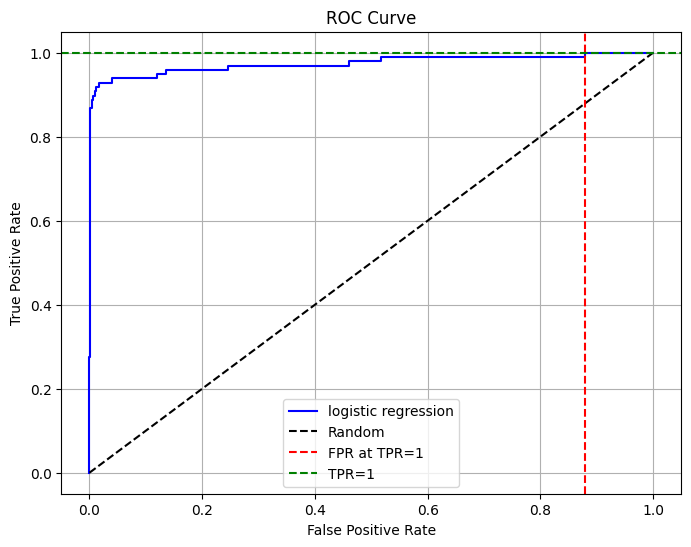

In [97]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np


fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])


first_idx = np.argmax(tpr == 1.0)
first_fpr = fpr[first_idx]


print(f"First point where TPR=1.0: (FPR={first_fpr:.4f}, TPR=1.0)")


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='logistic regression', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random')


plt.axvline(x=first_fpr, color='red', linestyle='--', label='FPR at TPR=1')
plt.axhline(y=1.0, color='green', linestyle='--', label='TPR=1')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


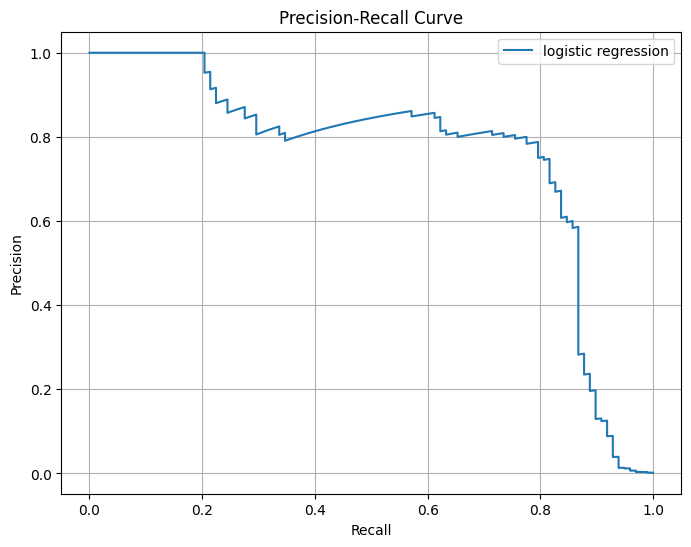

In [98]:
from sklearn.metrics import precision_recall_curve

precision, recall, pr_thresholds = precision_recall_curve(y_test, probs[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='logistic regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()